In [268]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [269]:
path = r"C:\Users\chan\Desktop\dataset"
df = pd.read_csv(path + "\ThoraricSurgery.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [270]:
df.shape

(470, 18)

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rdata = df.iloc[:,:-1]
data = scaler.fit_transform(rdata)
label = np.array(df.iloc[:,-1]).reshape(-1,1)

In [272]:
data.shape


(470, 17)

In [273]:
X = tf.placeholder(tf.float32, shape=[None,data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.random_normal([data.shape[1],1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.sigmoid(tf.matmul(X,W)+b)
cost = -tf.reduce_mean(Y*tf.log(hf) + (1-Y)*tf.log(1-hf))
opt = tf.train.GradientDescentOptimizer(0.001)
train = opt.minimize(cost)

In [274]:
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [275]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed_dict = {X:data, Y:label}
cv = sess.run(cost, feed_dict)
cv

0.9237145

In [276]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {X:data, Y:label}
    for step in range(20001):
        _, cv = sess.run([train, cost], feed_dict=feed_dict)
        if step % 1000 == 0:
            print(f"cost : {cv}")
    print("Training is Done")
    print("=*="*10)
    
    pv, hfv, av = sess.run([predicted, hf, accuracy],
                          feed_dict=feed_dict)
#     print(f"예측값 : {pv}, \n 예측분류 : {hfv} \n, 정확도 : {av}")
    print(f"정확도 : {av}")
    sess.close()

cost : 0.9237145185470581
cost : 0.8028867244720459
cost : 0.7101439237594604
cost : 0.6389367580413818
cost : 0.5842043161392212
cost : 0.542082667350769
cost : 0.5096139311790466
cost : 0.4845268130302429
cost : 0.46507132053375244
cost : 0.44989994168281555
cost : 0.4379758834838867
cost : 0.4285115599632263
cost : 0.42091619968414307
cost : 0.41474980115890503
cost : 0.40968626737594604
cost : 0.4054836630821228
cost : 0.4019607901573181
cost : 0.39898139238357544
cost : 0.39644089341163635
cost : 0.39425867795944214
cost : 0.39237144589424133
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8531914949417114


# Train_Test 나눠서 진행

In [277]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=33)

X = tf.placeholder(tf.float32, shape=[None,data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.random_normal([data.shape[1],1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.sigmoid(tf.matmul(X,W)+b)
cost = -tf.reduce_mean(Y*tf.log(hf) + (1-Y)*tf.log(1-hf))
opt = tf.train.GradientDescentOptimizer(0.001)
train = opt.minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [278]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {X:X_train, Y:y_train}
    for step in range(20001):
        _, cv = sess.run([train, cost], feed_dict=feed_dict)
        if step % 1000 == 0:
            print(f"cost : {cv}")
    print("Training is Done")
    print("=*="*10)
    
    pv, hfv, av = sess.run([predicted, hf, accuracy],
                          feed_dict={X:X_test,Y:y_test})
#     print(f"예측값 : {pv}, \n 예측분류 : {hfv} \n, 정확도 : {av}")
    print(f"정확도 : {av}")
    sess.close()

cost : 1.3811299800872803
cost : 1.2013882398605347
cost : 1.0589743852615356
cost : 0.9440013766288757
cost : 0.8495820760726929
cost : 0.770969569683075
cost : 0.7048632502555847
cost : 0.6490042805671692
cost : 0.6017193794250488
cost : 0.5620474219322205
cost : 0.5298069715499878
cost : 0.5043300986289978
cost : 0.48401954770088196
cost : 0.46749886870384216
cost : 0.4539000391960144
cost : 0.4426581561565399
cost : 0.43336546421051025
cost : 0.4257008731365204
cost : 0.41939884424209595
cost : 0.41423311829566956
cost : 0.4100090563297272
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8510638475418091


# 분류 기준에 따른 변화 확인

In [282]:
accuracy_list = []
idx_list = []
for i in range(20,90,5):
    idx = i/100
    predicted = tf.cast(hf>idx, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            _, cv = sess.run([train, cost], feed_dict={X:X_train, Y:y_train})
        print("Training is Done")
        pv, hfv, av = sess.run([predicted, hf, accuracy],
                              feed_dict={X:X_test,Y:y_test})
    #     print(f"예측값 : {pv}, \n 예측분류 : {hfv} \n, 정확도 : {av}")
        print(f"정확도 : {av}")
        print("=*="*10)
        accuracy_list.append(av)
        idx_list.append(idx)
        sess.close()

Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.6382978558540344
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.6241135001182556
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.716312050819397
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.7446808218955994
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.7730496525764465
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.7659574747085571
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8085106611251831
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8156028389930725
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8368794322013855
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8510638475418091
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8439716100692749
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8510638475418091
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 : 0.8368794322013855
Training is Done
=*==*==*==*==*==*==*==*==*==*=
정확도 

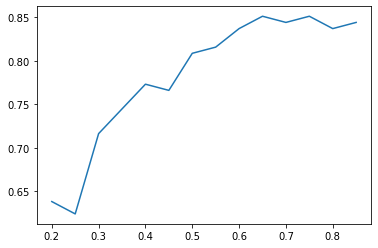

In [283]:
plt.plot(idx_list, accuracy_list)